## Carregando base dados

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('IPODataFull.csv', sep=',', encoding='latin-1')

C:\Users\logonrmlocal\AppData\Local\Temp\ipykernel_9972\1417228508.py:1: DtypeWarning: Columns (1342,1425,1432,1543,1546,1549,1551,1552,1553,1562,1587,1588,1605,1608,1615,1619,1620,1621,1622,1629,1630,1632,1633,1640,1641,1642,1643,1644,1646) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('IPODataFull.csv', sep=',', encoding='latin-1')


## Selecionando as colunas necessárias para a análise

In [3]:
data = data[['DaysBetterThanSP','daysProfit','Year','Month','Day','dayOfWeek','closeDay0', 'Profitable', 'Safe']]
data = data.rename(columns={
#     'Symbol': 'Ticker',
    'DaysBetterThanSP': 'DiasMelhoresQueSP',
    'daysProfit': 'DiasDeLucro',
    'Year': 'Ano',
    'Month': 'Mês',
    'Day': 'Dia',
    'dayOfWeek': 'DiaDaSemana',
    'closeDay0': 'FechamentoDia0',
    'Profitable': 'Lucrativo',
    'Safe': 'Seguro'
})
display(data)

,DiasMelhoresQueSP,DiasDeLucro,Ano,Mês,Dia,DiaDaSemana,FechamentoDia0,Lucrativo,Seguro
0,122,249,1999,11,18,3,28.6358,1,0
1,131,262,2014,10,2,3,18.5000,1,1
2,125,262,2013,9,26,3,9.9600,1,0
3,128,261,2001,11,29,3,13.9000,1,0
4,123,127,2011,1,13,3,21.2500,0,0
...,...,...,...,...,...,...,...,...,...
3757,139,261,2005,5,6,4,12.4350,1,1
3758,5,7,2018,4,12,3,20.0000,0,0
3759,102,25,2011,5,12,3,5.8500,0,0
3760,115,19,2017,4,28,4,13.0000,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DiasMelhoresQueSP  3762 non-null   int64  
 1   DiasDeLucro        3762 non-null   int64  
 2   Ano                3762 non-null   int64  
 3   Mês                3762 non-null   int64  
 4   Dia                3762 non-null   int64  
 5   DiaDaSemana        3762 non-null   int64  
 6   FechamentoDia0     3762 non-null   float64
 7   Lucrativo          3762 non-null   int64  
 8   Seguro             3762 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 264.6 KB


## Visualizando o histograma das colunas para análise

In [5]:
import matplotlib.pyplot as plt  
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


array([[<AxesSubplot:title={'center':'DiasMelhoresQueSP'}>,
        <AxesSubplot:title={'center':'DiasDeLucro'}>,
        <AxesSubplot:title={'center':'Ano'}>],
       [<AxesSubplot:title={'center':'Mês'}>,
        <AxesSubplot:title={'center':'Dia'}>,
        <AxesSubplot:title={'center':'DiaDaSemana'}>],
       [<AxesSubplot:title={'center':'FechamentoDia0'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

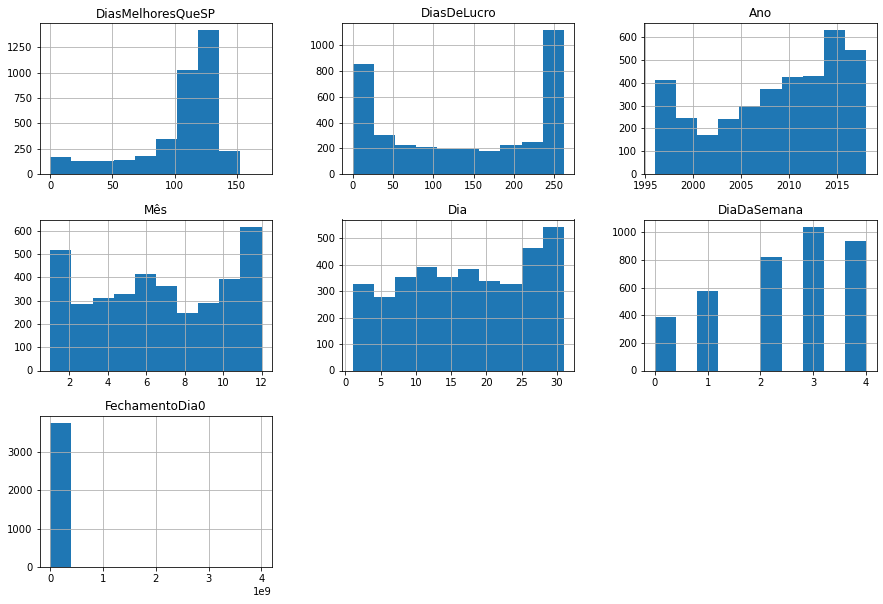

In [6]:
dados = data.drop(columns = ['Lucrativo', 'Seguro'])
dados.hist(figsize=(15,10))

In [7]:
print('De 3761 empresas, {} foram consideradas lucrativas investir'.format(list(data['Lucrativo']).count(1)))
print('De 3761 empresas, {} empresas foram consideradas seguro investir'.format(list(data['Seguro']).count(1)))

De 3761 empresas, 1985 foram consideradas lucrativas investir
De 3761 empresas, 654 empresas foram consideradas seguro investir


### Vamos gerar algumas estatísticas e visualizações exploratórias dos dados:

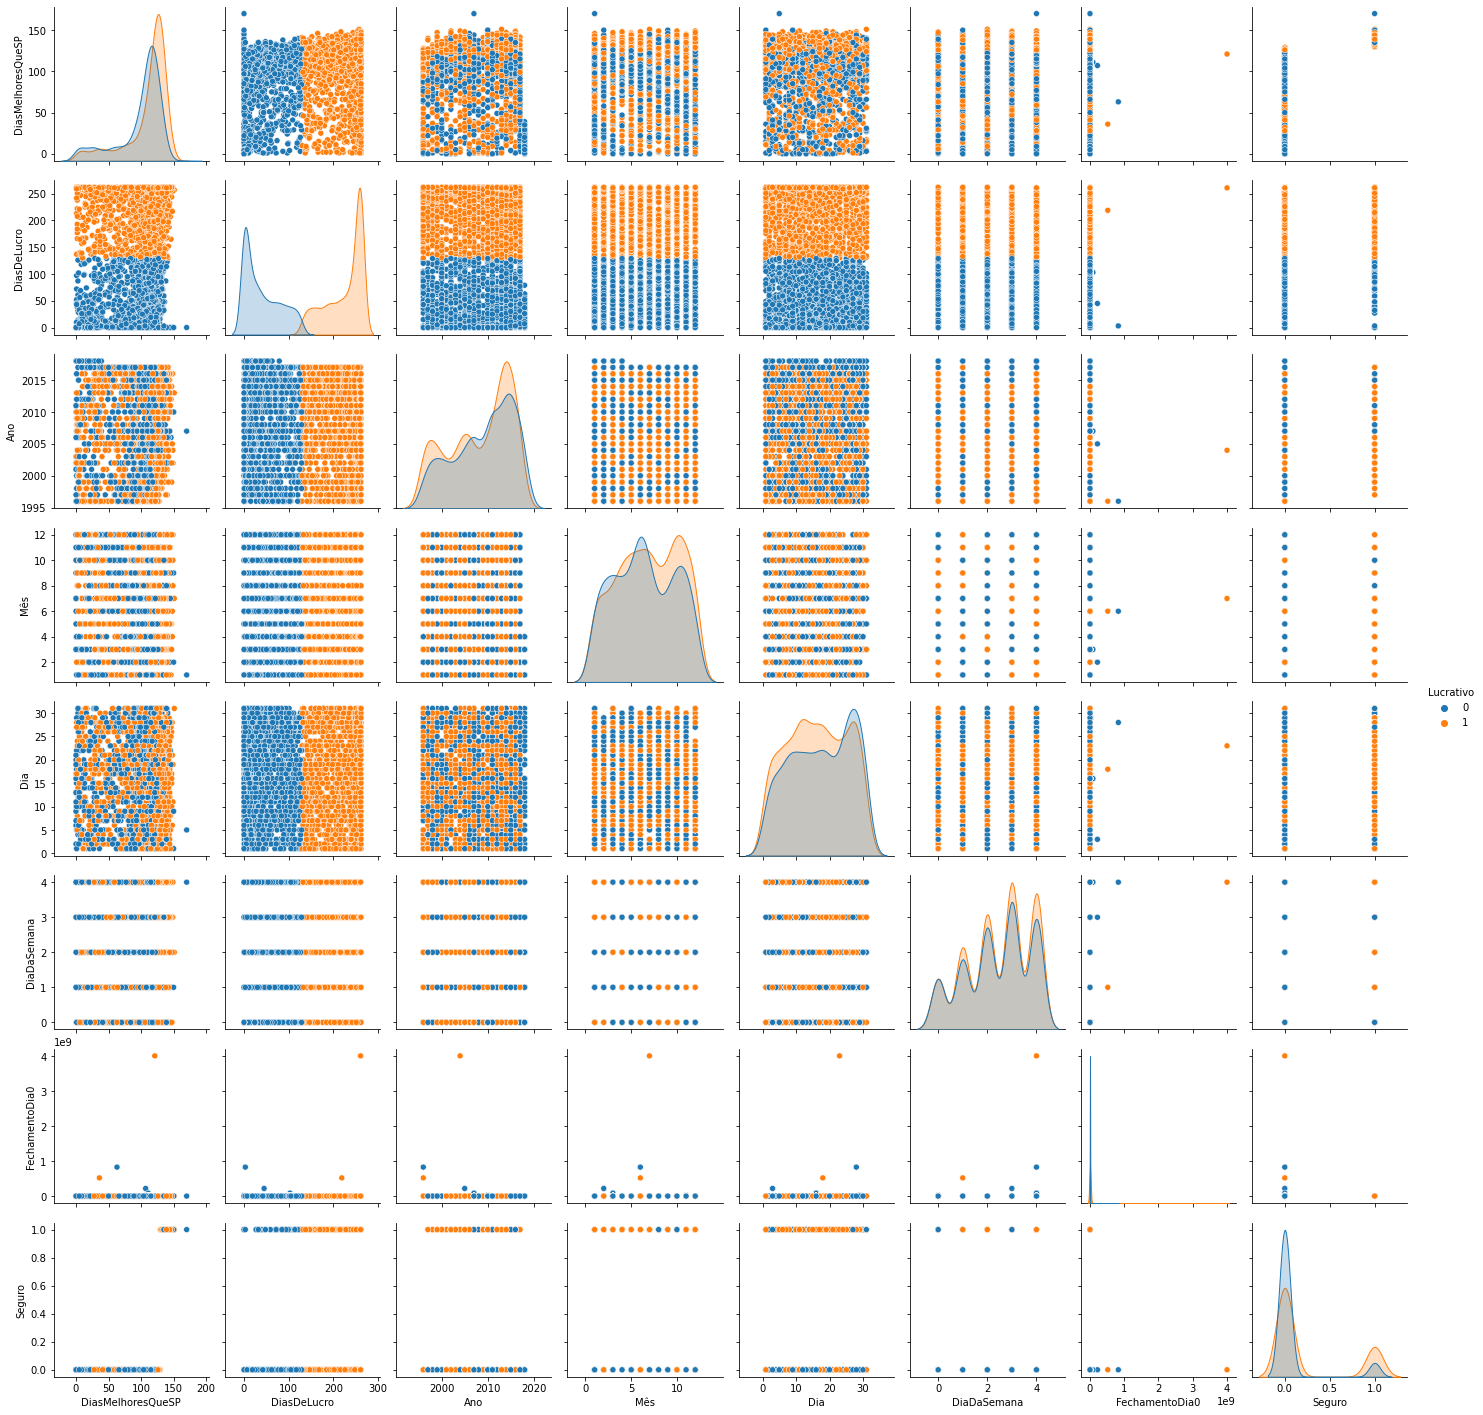

,DiasMelhoresQueSP,DiasDeLucro,Ano,Mês,Dia,DiaDaSemana,FechamentoDia0,Seguro
Lucrativo,,,,,,,,
0,97.903770,40.774339,2008.987620,6.444569,17.427687,2.386044,6.532706e+05,0.086663
1,108.989421,225.328967,2008.212091,6.872040,16.155668,2.443325,2.280814e+06,0.251889


,DiasMelhoresQueSP,DiasDeLucro,Ano,Mês,Dia,DiaDaSemana,FechamentoDia0,Seguro
Lucrativo,,,,,,,,
0,34.765224,40.053726,6.367576,3.296086,9.019965,1.296473,2.041704e+07,0.281420
1,33.335407,41.008274,6.657055,3.336134,8.761884,1.282221,9.068100e+07,0.434207


In [8]:
sns.pairplot(data, hue='Lucrativo')
plt.show()
display(data.groupby('Lucrativo').mean())
display(data.groupby('Lucrativo').std())

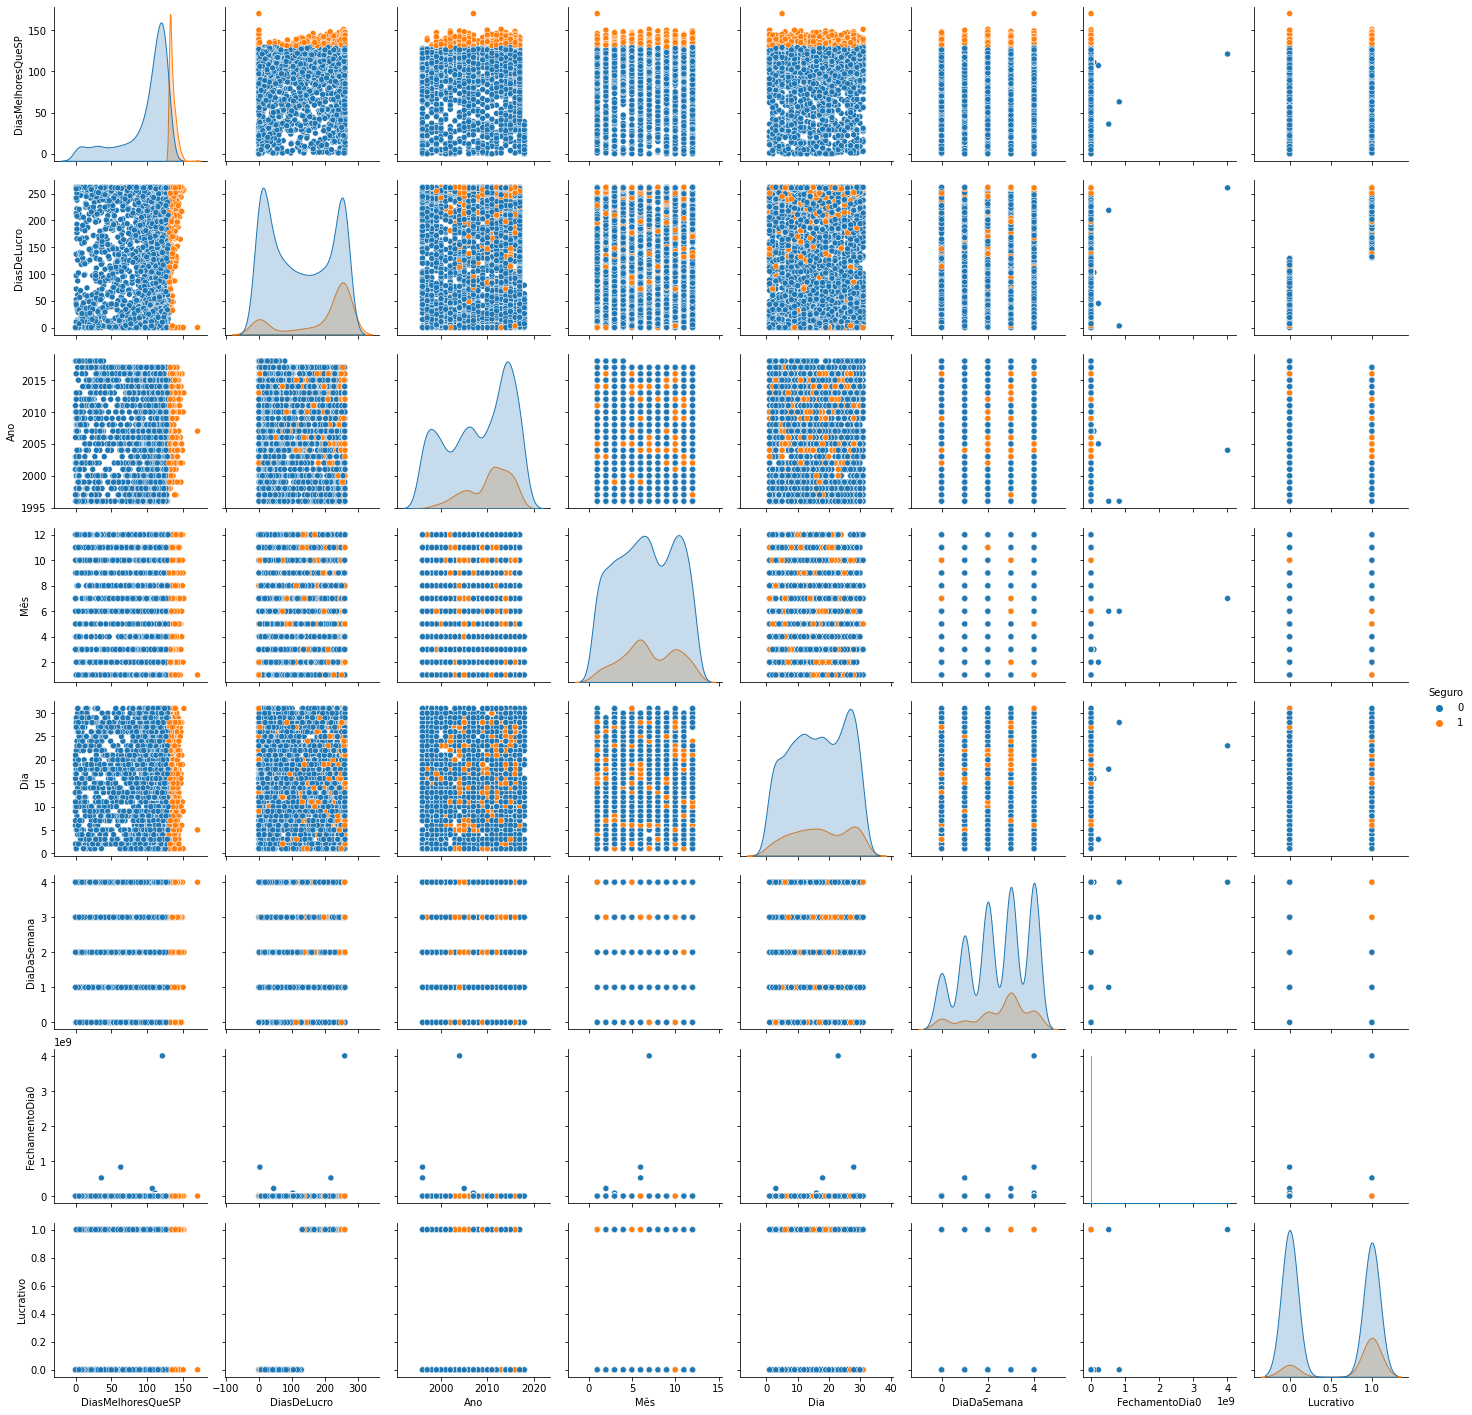

,DiasMelhoresQueSP,DiasDeLucro,Ano,Mês,Dia,DiaDaSemana,FechamentoDia0,Lucrativo
Seguro,,,,,,,,
0,97.183719,127.241956,2008.181789,6.608752,16.648005,2.403797,1.830197e+06,0.477799
1,134.972477,190.009174,2010.463303,6.961774,17.272171,2.475535,3.911726e+01,0.764526


,DiasMelhoresQueSP,DiasDeLucro,Ano,Mês,Dia,DiaDaSemana,FechamentoDia0,Lucrativo
Seguro,,,,,,,,
0,34.419870,97.574647,6.806638,3.363325,8.881672,1.298688,7.409041e+07,0.499587
1,4.622918,99.090504,4.586521,3.114469,9.010930,1.241885,3.667134e+02,0.424619


In [9]:
sns.pairplot(data, hue='Seguro')
plt.show()
display(data.groupby('Seguro').mean())
display(data.groupby('Seguro').std())

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Excluindo as colunas de resposta
x = data.drop(columns = ['Lucrativo', 'Seguro'])

## Predição das coluna "Lucrativo"

### Dividindo conjunto de treinamento e conjunto de teste

In [12]:
y = data['Lucrativo'] # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 8)

###  Transformar dados

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
# Instanciando o Escalonador
# scaler = StandardScaler()
scaler = MinMaxScaler()

# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Treinar o algoritmo com diferentes modelos de predição

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

#### Classificador Bayesianos

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       393
           1       1.00      0.93      0.96       360

    accuracy                           0.97       753
   macro avg       0.97      0.97      0.97       753
weighted avg       0.97      0.97      0.97       753



<Figure size 1080x360 with 0 Axes>

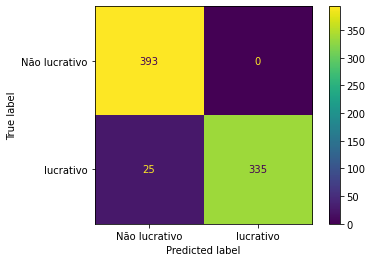

In [16]:
# Naive Bayes Gaussiano
from sklearn.naive_bayes import GaussianNB

# Passo 4 - Treinar o Classificador
gnb = GaussianNB()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)
gnb.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = gnb.predict(x_test_scaled) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes)

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                             display_labels = ['Não lucrativo','lucrativo'])
disp.plot(values_format='d') 

#### Classificador KNN

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       393
           1       0.98      0.98      0.98       360

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753



<Figure size 1080x360 with 0 Axes>

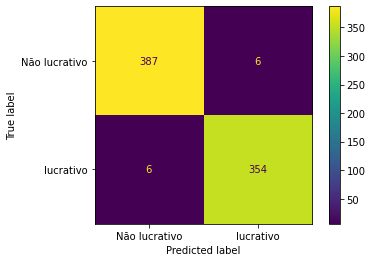

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Treinar o Classificador
knn = KNeighborsClassifier() # Criando classificador
knn.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Testar o Classificador
y_predicoes = knn.predict(x_test_scaled) 

print(classification_report(y_test, y_predicoes))

# Criando matriz de confusão para comparar o valor da predição com o real valor
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes)

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                             display_labels = ['Não lucrativo','lucrativo'])
disp.plot(values_format='d') 

#### Árvore de decisão

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       360

    accuracy                           1.00       753
   macro avg       1.00      1.00      1.00       753
weighted avg       1.00      1.00      1.00       753



<Figure size 1080x360 with 0 Axes>

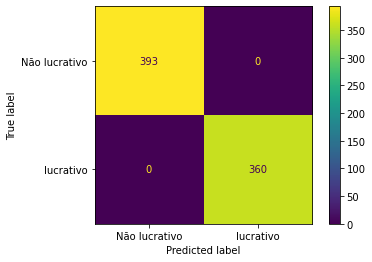

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Treinar o Classificador
dtree = DecisionTreeClassifier() # Criando classificador
dtree.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Testar o Classificador
y_predicoes = dtree.predict(x_test_scaled) 

print(classification_report(y_test, y_predicoes))

# Criando matriz de confusão para comparar o valor da predição com o real valor
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes)

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                             display_labels = ['Não lucrativo','lucrativo'])
disp.plot(values_format='d') 

#### Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       360

    accuracy                           1.00       753
   macro avg       1.00      1.00      1.00       753
weighted avg       1.00      1.00      1.00       753



<Figure size 1080x360 with 0 Axes>

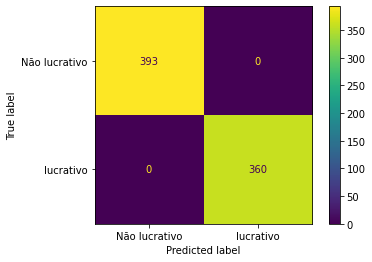

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Treinar o Classificador
rf = RandomForestClassifier(random_state=42) # Criando classificador (hiperparametro de seed)
rf.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Testar o Classificador
y_predicoes = rf.predict(x_test_scaled) 

print(classification_report(y_test, y_predicoes))

# Criando matriz de confusão para comparar o valor da predição com o real valor
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes)

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                             display_labels = ['Não lucrativo','lucrativo'])
disp.plot(values_format='d') 

#### Máquina de vetor suporte (SVM)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       393
           1       0.99      0.99      0.99       360

    accuracy                           0.99       753
   macro avg       0.99      0.99      0.99       753
weighted avg       0.99      0.99      0.99       753



<Figure size 1080x360 with 0 Axes>

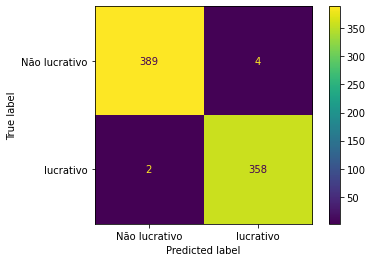

In [20]:
from sklearn.svm import SVC

# Treinar o Classificador
svm = SVC() # Criando classificador
svm.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Testar o Classificador
y_predicoes = svm.predict(x_test_scaled) 

print(classification_report(y_test, y_predicoes))

# Criando matriz de confusão para comparar o valor da predição com o real valor
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes)

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                             display_labels = ['Não lucrativo','lucrativo'])
disp.plot(values_format='d') 

#### Classificador por regressão logística

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       393
           1       0.99      1.00      1.00       360

    accuracy                           1.00       753
   macro avg       1.00      1.00      1.00       753
weighted avg       1.00      1.00      1.00       753



<Figure size 1080x360 with 0 Axes>

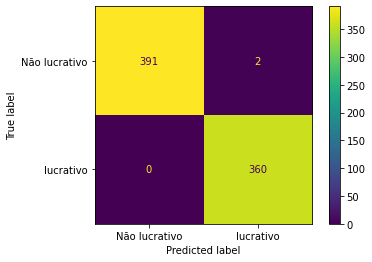

In [21]:

from sklearn.linear_model import LogisticRegression

# Treinar o Classificador
logreg = LogisticRegression() # Criando classificador
logreg.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Testar o Classificador
y_predicoes = logreg.predict(x_test_scaled) 

print(classification_report(y_test, y_predicoes))

# Criando matriz de confusão para comparar o valor da predição com o real valor
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes)

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                             display_labels = ['Não lucrativo','lucrativo'])
disp.plot(values_format='d') 

## Predição das coluna "Seguro"

### Dividindo conjunto de treinamento e conjunto de teste

In [22]:
y = data['Seguro'] # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 8)

###  Transformar dados

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [24]:
# Instanciando o Escalonador
# scaler = StandardScaler()
scaler = MinMaxScaler()

# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Treinar o algoritmo com diferentes modelos de predição

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

#### Classificador Bayesianos

              precision    recall  f1-score   support

           0       1.00      0.66      0.79       627
           1       0.37      1.00      0.54       126

    accuracy                           0.72       753
   macro avg       0.69      0.83      0.67       753
weighted avg       0.89      0.72      0.75       753



<Figure size 1080x360 with 0 Axes>

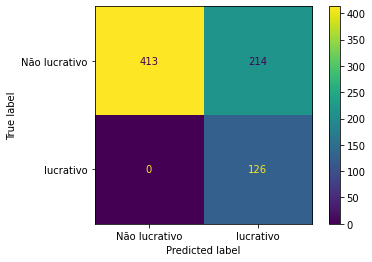

In [26]:
# Naive Bayes Gaussiano
from sklearn.naive_bayes import GaussianNB

# Passo 4 - Treinar o Classificador
gnb = GaussianNB()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)
gnb.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = gnb.predict(x_test_scaled) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes)

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                             display_labels = ['Não lucrativo','lucrativo'])
disp.plot(values_format='d') 

#### Classificador KNN

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       627
           1       0.64      0.49      0.56       126

    accuracy                           0.87       753
   macro avg       0.77      0.72      0.74       753
weighted avg       0.86      0.87      0.86       753



<Figure size 1080x360 with 0 Axes>

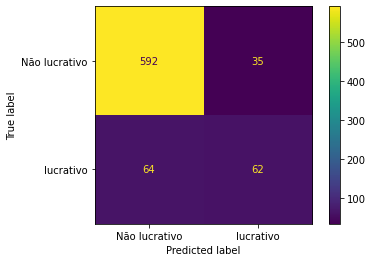

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Treinar o Classificador
knn = KNeighborsClassifier() # Criando classificador
knn.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Testar o Classificador
y_predicoes = knn.predict(x_test_scaled) 

print(classification_report(y_test, y_predicoes))

# Criando matriz de confusão para comparar o valor da predição com o real valor
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes)

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                             display_labels = ['Não lucrativo','lucrativo'])
disp.plot(values_format='d') 

#### Árvore de decisão

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       627
           1       1.00      1.00      1.00       126

    accuracy                           1.00       753
   macro avg       1.00      1.00      1.00       753
weighted avg       1.00      1.00      1.00       753



<Figure size 1080x360 with 0 Axes>

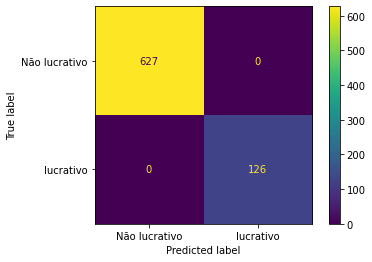

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Treinar o Classificador
dtree = DecisionTreeClassifier() # Criando classificador
dtree.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Testar o Classificador
y_predicoes = dtree.predict(x_test_scaled) 

print(classification_report(y_test, y_predicoes))

# Criando matriz de confusão para comparar o valor da predição com o real valor
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes)

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                             display_labels = ['Não lucrativo','lucrativo'])
disp.plot(values_format='d') 

#### Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       627
           1       1.00      1.00      1.00       126

    accuracy                           1.00       753
   macro avg       1.00      1.00      1.00       753
weighted avg       1.00      1.00      1.00       753



<Figure size 1080x360 with 0 Axes>

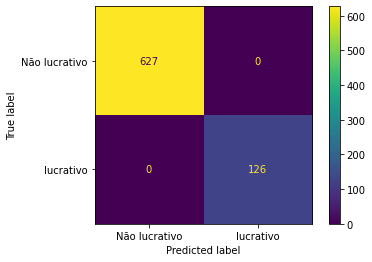

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Treinar o Classificador
rf = RandomForestClassifier(random_state=42) # Criando classificador (hiperparametro de seed)
rf.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Testar o Classificador
y_predicoes = rf.predict(x_test_scaled) 

print(classification_report(y_test, y_predicoes))

# Criando matriz de confusão para comparar o valor da predição com o real valor
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes)

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                             display_labels = ['Não lucrativo','lucrativo'])
disp.plot(values_format='d') 

#### Máquina de vetor suporte (SVM)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       627
           1       0.98      0.73      0.84       126

    accuracy                           0.95       753
   macro avg       0.96      0.86      0.90       753
weighted avg       0.95      0.95      0.95       753



<Figure size 1080x360 with 0 Axes>

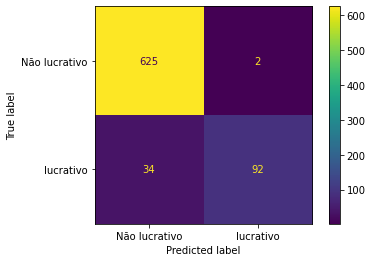

In [30]:
from sklearn.svm import SVC

# Treinar o Classificador
svm = SVC() # Criando classificador
svm.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Testar o Classificador
y_predicoes = svm.predict(x_test_scaled) 

print(classification_report(y_test, y_predicoes))

# Criando matriz de confusão para comparar o valor da predição com o real valor
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes)

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                             display_labels = ['Não lucrativo','lucrativo'])
disp.plot(values_format='d') 

#### Classificador por regressão logística

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       627
           1       1.00      0.42      0.59       126

    accuracy                           0.90       753
   macro avg       0.95      0.71      0.77       753
weighted avg       0.91      0.90      0.89       753



<Figure size 1080x360 with 0 Axes>

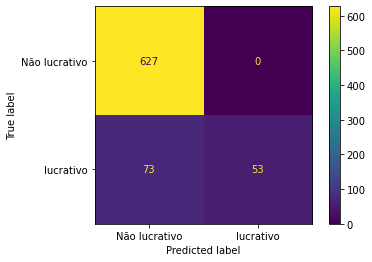

In [31]:

from sklearn.linear_model import LogisticRegression

# Treinar o Classificador
logreg = LogisticRegression() # Criando classificador
logreg.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Testar o Classificador
y_predicoes = logreg.predict(x_test_scaled) 

print(classification_report(y_test, y_predicoes))

# Criando matriz de confusão para comparar o valor da predição com o real valor
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes)

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                             display_labels = ['Não lucrativo','lucrativo'])
disp.plot(values_format='d') 